<a href="https://colab.research.google.com/github/Pooja123667/Smart_Tendering_ML/blob/main/Smart_Tender_system_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary Libraries <br>
**1. Understanding and Analyzing the Dataset**

In [1]:
import pandas as pd
import io 
print("Import success")

Import success


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Pooja123667/Smart_Tendering_ML/main/FY19_BID_Trends_Report_Data%20(3).csv", low_memory=False) 
#https://raw.githubusercontent.com/Pooja123667/Smart_Tendering_ML/main/FY19_BID_Trends_Report_Data%20(3).csv
#https://raw.githubusercontent.com/Pooja123667/Smart_Tendering_ML/main/file_name%20(2).csv

In [3]:
df.head(1)

,Unnamed: 0,index,company name,Floor Size,Full-time staff,Sanitation staff employed,Safety Inspector,Part-time staff,Current clients,Bid provides supplemental sanitation services,Types of duties assigned to sanitation workers,Days per week of sanitation services,Hours logged by sanitation workers,Incidents of graffiti removed,Trash bags collected,Trash and recycling receptacles serviced,Bid provides supplemental public safety services,Duties assigned to public safety personnel,Hours logged by public safety officers,Interactions with public safety officers,Bid provides supplemental streetscape and beautification services,Planters and hanging baskets maintained,Tree pits maintained,Banners maintained,Public art installations sponsored,Street furniture elements maintained,Wayfinding elements maintained,Lighting elements maintained,Other infrastructure elements maintained,Public spaces maintained,Bid has holiday lighting program,Communication channels used,Social media followers,Marketing materials distributed,Public events coordinated,Estimated attendees to public events coordinated,Special event charges,Miscellaneous charges,Sanitation expenses,Public safety expenses,"Marketing, holiday lighting, and special event expenses",Streetscape & beautification expenses,Salaries,Outside contractor expenses,Insurance costs,Rent and utilities,Supplies and equipment costs,Other G&A expenses
0,0,1,Moreno LLC,5220.0,1.0,31.0,9.0,9.0,145,Yes,Street Sweeping and Bagging; Snow and Ice Remo...,7.0,61051.0,19327,70352.0,282.0,No,NaN,24732.0,NaN,Yes,341.0,115.0,105.0,12.0,2304,828,2161,786,19.0,Yes,Direct mailings; Flyers; Email bulletins; Soci...,11716.0,40108.0,15.0,198647.0,"360,146","16,591","76,277","40,756","$177,762","39,202","194,141","101,399","2,035","$12,296","3,749","$46,053"


In [4]:
df.shape

(99998, 48)

In [5]:
df.describe()

,Unnamed: 0,index,Floor Size,Full-time staff,Sanitation staff employed,Safety Inspector,Part-time staff,Days per week of sanitation services,Hours logged by sanitation workers,Trash bags collected,Trash and recycling receptacles serviced,Hours logged by public safety officers,Interactions with public safety officers,Planters and hanging baskets maintained,Tree pits maintained,Banners maintained,Public art installations sponsored,Public spaces maintained,Social media followers,Marketing materials distributed,Public events coordinated,Estimated attendees to public events coordinated
count,99998.000000,99998.000000,97377.000000,97377.000000,97377.000000,97377.000000,97377.000000,93370.000000,97377.000000,97377.000000,97377.000000,69311.000000,66751.000000,97377.000000,97377.000000,97377.000000,97377.000000,82795.000000,97377.000000,97377.000000,97377.000000,97377.000000
mean,49998.500000,49999.500000,20542.258418,5.824260,41.174045,28.666318,11.818468,6.585927,82396.797509,141080.069996,218.030171,61237.879947,60503.866699,301.553437,212.474229,114.386128,15.346160,38.358307,30014.197264,60148.031660,206.254085,104914.274202
std,28867.080446,28867.080446,19461.774039,12.814629,24.179840,17.154586,6.468663,1.236232,44122.700220,66361.097687,119.087319,35649.908361,32662.499621,158.564854,147.943093,64.418373,5.340999,24.857368,92933.776156,34881.623679,105.411538,56397.947078
min,0.000000,1.000000,1740.000000,0.000000,2.000000,1.000000,1.000000,1.000000,9995.000000,29905.000000,17.000000,2339.000000,6168.000000,40.000000,15.000000,11.000000,6.000000,0.000000,190.000000,2684.000000,15.000000,4721.000000
25%,24999.250000,25000.250000,8010.000000,1.000000,23.000000,12.000000,7.000000,7.000000,49762.000000,81912.000000,106.000000,26720.000000,28259.000000,182.000000,77.000000,56.000000,11.000000,14.000000,6381.000000,27084.000000,118.000000,52300.000000
50%,49998.500000,49999.500000,13140.000000,2.000000,38.000000,29.000000,12.000000,7.000000,74009.000000,137515.000000,231.000000,62635.000000,59132.000000,313.000000,176.000000,124.000000,15.000000,41.000000,9760.000000,64104.000000,210.000000,112582.000000
75%,74997.750000,74998.750000,27170.000000,3.000000,61.000000,42.000000,16.000000,7.000000,119771.000000,192990.000000,318.000000,97698.000000,85887.000000,426.000000,356.000000,172.000000,20.000000,61.000000,18551.000000,82179.000000,291.000000,152033.000000
max,99997.000000,99998.000000,121820.000000,64.000000,84.000000,58.000000,24.000000,7.000000,164685.000000,256155.000000,408.000000,121471.000000,118658.000000,556.000000,471.000000,212.000000,23.000000,79.000000,787253.000000,121778.000000,381.000000,199018.000000


In [ ]:
df.info()

Columns J, Q and AE did not contain any values after 75, using python to fill in values


In [7]:
#working on columns Types of duties assigned to sanitation workers, Communication channels used, Duties assigned to public safety personnel
#df['Types of duties assigned to sanitation workers']
import random
for i in range(75, 99998):
  df['Types of duties assigned to sanitation workers'][i] = df['Types of duties assigned to sanitation workers'][random.randrange(0,74)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
df['Types of duties assigned to sanitation workers'][90000]

'Street Sweeping and Bagging; Power Washing; Snow and Ice Removal; Graffiti Removal'

In [9]:
for i in range(75, 99998):
  df['Duties assigned to public safety personnel'][i] = df['Duties assigned to public safety personnel'][random.randrange(0,74)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df['Duties assigned to public safety personnel'][3000]

'Monitoring security cameras; Street patrol; Traffic mitigation; Coordination with NYPD'

In [11]:
for i in range(75, 99998):
  df['Communication channels used'][i] = df['Communication channels used'][random.randrange(0,74)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df['Communication channels used'][90000]

'Print advertising (i.e. local newspaper); Digital advertising (i.e. Google, Facebook, Instagram ads); Flyers; Email bulletins; Social media; LinkNYC advertising (more info)'

In [ ]:
df.info()

In [14]:
#Dropping unnecessary columns
df.drop(['Marketing, holiday lighting, and special event expenses','Rent and utilities','Other G&A expenses'], axis=1, inplace=True)

In [15]:
df.shape

(99998, 45)

Now we shall replace all "$" signs in the columns to a null value

In [16]:
#replace function for replacing all "$" sign to " " for the following - 

#Miscellaneous charges
#Public safety expenses
#Streetscape & beautification expenses
#Salaries
#Outside contractor expenses
#Insurance costs
#Supplies and equipment costs
#Sanitation expenses


df['Special event charges'] = df['Special event charges'].str.replace("$","")
df['Miscellaneous charges'] = df['Miscellaneous charges'].str.replace("$","")
df['Sanitation expenses'] = df['Sanitation expenses'].str.replace("$","")
df['Public safety expenses'] = df['Public safety expenses'].str.replace("$","")
df['Streetscape & beautification expenses'] = df['Streetscape & beautification expenses'].str.replace("$","")
df['Salaries'] = df['Salaries'].str.replace("$","")
df['Outside contractor expenses'] = df['Outside contractor expenses'].str.replace("$","")
df['Insurance costs'] = df['Insurance costs'].str.replace("$","")
df['Supplies and equipment costs'] = df['Supplies and equipment costs'].str.replace("$","")




In [17]:
#Dropping unnecessary columns
df.head(1)

,Unnamed: 0,index,company name,Floor Size,Full-time staff,Sanitation staff employed,Safety Inspector,Part-time staff,Current clients,Bid provides supplemental sanitation services,Types of duties assigned to sanitation workers,Days per week of sanitation services,Hours logged by sanitation workers,Incidents of graffiti removed,Trash bags collected,Trash and recycling receptacles serviced,Bid provides supplemental public safety services,Duties assigned to public safety personnel,Hours logged by public safety officers,Interactions with public safety officers,Bid provides supplemental streetscape and beautification services,Planters and hanging baskets maintained,Tree pits maintained,Banners maintained,Public art installations sponsored,Street furniture elements maintained,Wayfinding elements maintained,Lighting elements maintained,Other infrastructure elements maintained,Public spaces maintained,Bid has holiday lighting program,Communication channels used,Social media followers,Marketing materials distributed,Public events coordinated,Estimated attendees to public events coordinated,Special event charges,Miscellaneous charges,Sanitation expenses,Public safety expenses,Streetscape & beautification expenses,Salaries,Outside contractor expenses,Insurance costs,Supplies and equipment costs
0,0,1,Moreno LLC,5220.0,1.0,31.0,9.0,9.0,145,Yes,Street Sweeping and Bagging; Snow and Ice Remo...,7.0,61051.0,19327,70352.0,282.0,No,NaN,24732.0,NaN,Yes,341.0,115.0,105.0,12.0,2304,828,2161,786,19.0,Yes,Direct mailings; Flyers; Email bulletins; Soci...,11716.0,40108.0,15.0,198647.0,"360,146","16,591","76,277","40,756","39,202","194,141","101,399","2,035","3,749"


In [18]:
df.shape

(99998, 45)

In [19]:
df.head(1)

,Unnamed: 0,index,company name,Floor Size,Full-time staff,Sanitation staff employed,Safety Inspector,Part-time staff,Current clients,Bid provides supplemental sanitation services,Types of duties assigned to sanitation workers,Days per week of sanitation services,Hours logged by sanitation workers,Incidents of graffiti removed,Trash bags collected,Trash and recycling receptacles serviced,Bid provides supplemental public safety services,Duties assigned to public safety personnel,Hours logged by public safety officers,Interactions with public safety officers,Bid provides supplemental streetscape and beautification services,Planters and hanging baskets maintained,Tree pits maintained,Banners maintained,Public art installations sponsored,Street furniture elements maintained,Wayfinding elements maintained,Lighting elements maintained,Other infrastructure elements maintained,Public spaces maintained,Bid has holiday lighting program,Communication channels used,Social media followers,Marketing materials distributed,Public events coordinated,Estimated attendees to public events coordinated,Special event charges,Miscellaneous charges,Sanitation expenses,Public safety expenses,Streetscape & beautification expenses,Salaries,Outside contractor expenses,Insurance costs,Supplies and equipment costs
0,0,1,Moreno LLC,5220.0,1.0,31.0,9.0,9.0,145,Yes,Street Sweeping and Bagging; Snow and Ice Remo...,7.0,61051.0,19327,70352.0,282.0,No,NaN,24732.0,NaN,Yes,341.0,115.0,105.0,12.0,2304,828,2161,786,19.0,Yes,Direct mailings; Flyers; Email bulletins; Soci...,11716.0,40108.0,15.0,198647.0,"360,146","16,591","76,277","40,756","39,202","194,141","101,399","2,035","3,749"


Replacing all "," by "" and all NaN values by 0<br>
Would be required for adding the total sum later

In [20]:

df['Miscellaneous charges'] = df['Miscellaneous charges'].str.replace(",","").fillna("0")
df['Sanitation expenses'] = df['Sanitation expenses'].str.replace(",","").fillna("0")
df['Public safety expenses'] = df['Public safety expenses'].str.replace(",","").fillna("0")
df['Streetscape & beautification expenses'] = df['Streetscape & beautification expenses'].str.replace(",","").fillna("0")
df['Salaries'] = df['Salaries'].str.replace(",","").fillna("0")
df['Outside contractor expenses'] = df['Outside contractor expenses'].str.replace(",","").fillna("0")
df['Insurance costs'] = df['Insurance costs'].str.replace(",","").fillna("0")
df['Supplies and equipment costs'] = df['Supplies and equipment costs'].str.replace(",","").fillna("0")

In [21]:
df['Miscellaneous charges']

0         16591 
1         68277 
2         71153 
3         14927 
4         61766 
          ...   
99993     47806 
99994     30981 
99995    114141 
99996    104185 
99997     84325 
Name: Miscellaneous charges, Length: 99998, dtype: object

In [ ]:
df['Public safety expenses']

In [ ]:
df['Total Quotation'] = df['Miscellaneous charges'].astype("int") + df['Public safety expenses'].astype("int") +  df['Sanitation expenses'].astype("int") + df['Streetscape & beautification expenses'].astype("int") 
+ df['Salaries'].astype("int") + df['Outside contractor expenses'].astype("int") + df['Insurance costs'].astype("int") +  df['Supplies and equipment costs'].astype("int")
df['Total Quotation']
#Streetscape & beautification expenses   Outside contractor expenses     


In [ ]:
df.info()

Removing unnecessary attributes and merging some attributes

In [25]:
df.drop(['Types of duties assigned to sanitation workers','Duties assigned to public safety personnel'],axis=1,inplace=True)

In [26]:
df['Incidents of graffiti removed'] = df['Incidents of graffiti removed'].str.replace(",","")
df['Incidents of graffiti removed'] = df['Incidents of graffiti removed'].str.replace("-","0")
df['Incidents of graffiti removed'] = df['Incidents of graffiti removed'].fillna("0")

In [27]:
df['Number_Of_Sanitation_Activities'] = df['Incidents of graffiti removed'].astype("float") + df['Trash bags collected'] + df['Trash and recycling receptacles serviced']

In [28]:
df.drop(['Incidents of graffiti removed','Trash bags collected','Trash and recycling receptacles serviced'],axis=1,inplace=True)

In [29]:
df['Street furniture elements maintained'] = df['Street furniture elements maintained'].fillna("0")
df['Wayfinding elements maintained'] = df['Wayfinding elements maintained'].fillna("0")
df['Lighting elements maintained'] = df['Lighting elements maintained'].fillna("0")
df['Other infrastructure elements maintained'] = df['Other infrastructure elements maintained'].fillna("0")


In [30]:
df.dtypes

Unnamed: 0                                                             int64
index                                                                  int64
company name                                                          object
Floor Size                                                           float64
Full-time staff                                                      float64
Sanitation staff employed                                            float64
Safety Inspector                                                     float64
Part-time staff                                                      float64
Current clients                                                       object
Bid provides supplemental sanitation services                         object
Days per week of sanitation services                                 float64
Hours logged by sanitation workers                                   float64
Bid provides supplemental public safety services                      object

In [31]:
df['Beautification_Activities'] = df['Planters and hanging baskets maintained'] + df['Tree pits maintained'] + df['Banners maintained'] + df['Public art installations sponsored'] 
+ df['Street furniture elements maintained']
+ df['Wayfinding elements maintained']
+ df['Lighting elements maintained']
+ df['Public spaces maintained']

df['Beautification_Activities']

0         573.0
1         558.0
2         985.0
3         617.0
4         904.0
          ...  
99993     754.0
99994     399.0
99995    1010.0
99996     676.0
99997     766.0
Name: Beautification_Activities, Length: 99998, dtype: float64

In [32]:
df.drop(['Planters and hanging baskets maintained','Tree pits maintained','Banners maintained','Public art installations sponsored','Street furniture elements maintained','Wayfinding elements maintained','Lighting elements maintained','Other infrastructure elements maintained','Public spaces maintained'],axis=1,inplace=True)

In [33]:
df.shape

(99998, 34)

In [34]:
df['Beautification_Activities'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99993    False
99994    False
99995    False
99996    False
99997    False
Name: Beautification_Activities, Length: 99998, dtype: bool

In [35]:
df['Media_Reach'] = df['Social media followers'] + df['Marketing materials distributed'] + (df['Public events coordinated']*df['Estimated attendees to public events coordinated']) 

In [36]:
df.drop(['Social media followers','Marketing materials distributed','Public events coordinated','Estimated attendees to public events coordinated'],axis=1,inplace=True)

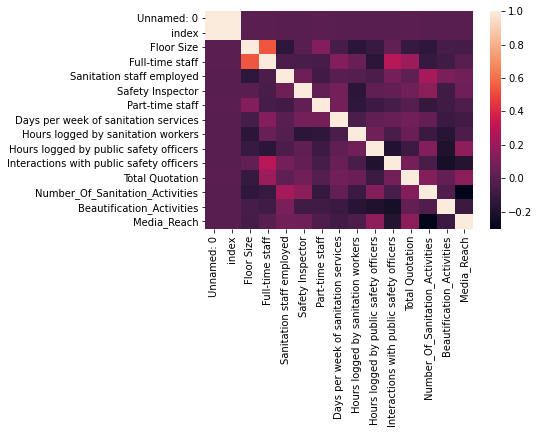

In [37]:
import seaborn as sns
a = df.corr()
sns.heatmap(a)

**2. EDA - Explolatory Data Analysis**